# Credit Card Application Acceptance Model

In [1]:
# Importing pyspark libraries
import os
import sys
os.environ["PYSPARK_PYTHON"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7/python"
os.environ["JAVA_HOME"] = "/usr/java/jdk1.8.0_161/jre"
os.environ["SPARK_HOME"] = "/home/ec2-user/spark-2.4.4-bin-hadoop2.7"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
sys.path.insert(0, os.environ["PYLIB"] + "/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] + "/pyspark.zip")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pyspark.sql.functions import *
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Starting a spark application
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = SparkContext()
sqlContext = SQLContext(sc)

In [4]:
# Read the credit records 
df_c = sqlContext.read.csv('credit_record.csv', header=True, inferSchema=True)
df_c.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)



In [5]:
# Read the application records
df_r = sqlContext.read.csv('application_record.csv', header=True, inferSchema=True)
df_r.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



## EDA (Exploratory Data Analysis)

In [6]:
df_c.count()

1048575

In [7]:
df_r.count()

438557

In [8]:
# Summary statistics of credit records
df_c.describe().show()

+-------+------------------+-------------------+-------------------+
|summary|                ID|     MONTHS_BALANCE|             STATUS|
+-------+------------------+-------------------+-------------------+
|  count|           1048575|            1048575|            1048575|
|   mean| 5068286.424673486|-19.136998307226474|0.05824863961501482|
| stddev|46150.578505349535| 14.023497688326477| 0.3949878642052491|
|    min|           5001711|                -60|                  0|
|    max|           5150487|                  0|                  X|
+-------+------------------+-------------------+-------------------+



In [9]:
# Summary statistics of application records
df_r.describe().show()

+-------+-----------------+-----------+------------+---------------+-------------------+------------------+--------------------+--------------------+------------------+-----------------+-------------------+-----------------+----------+------------------+-------------------+-------------------+--------------------+-----------------+
|summary|               ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|       CNT_CHILDREN|  AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|         DAYS_BIRTH|    DAYS_EMPLOYED|FLAG_MOBIL|   FLAG_WORK_PHONE|         FLAG_PHONE|         FLAG_EMAIL|     OCCUPATION_TYPE|  CNT_FAM_MEMBERS|
+-------+-----------------+-----------+------------+---------------+-------------------+------------------+--------------------+--------------------+------------------+-----------------+-------------------+-----------------+----------+------------------+-------------------+-------------------+--------------------+-----------------

In [10]:
df_c.show()

+-------+--------------+------+
|     ID|MONTHS_BALANCE|STATUS|
+-------+--------------+------+
|5001711|             0|     X|
|5001711|            -1|     0|
|5001711|            -2|     0|
|5001711|            -3|     0|
|5001712|             0|     C|
|5001712|            -1|     C|
|5001712|            -2|     C|
|5001712|            -3|     C|
|5001712|            -4|     C|
|5001712|            -5|     C|
|5001712|            -6|     C|
|5001712|            -7|     C|
|5001712|            -8|     C|
|5001712|            -9|     0|
|5001712|           -10|     0|
|5001712|           -11|     0|
|5001712|           -12|     0|
|5001712|           -13|     0|
|5001712|           -14|     0|
|5001712|           -15|     0|
+-------+--------------+------+
only showing top 20 rows



In [11]:
df_r.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|5008804|          M|           Y|              Y|           0|        427500.0|             Working|    Higher education|      Civil marriage| Rented apartment|    -12005|        -4542|         1

In [12]:
dff = df_c.join(df_r,on=['ID'],how='inner')
dff.show()

+-------+--------------+------+-----------+------------+---------------+------------+----------------+----------------+--------------------+------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|     ID|MONTHS_BALANCE|STATUS|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|
+-------+--------------+------+-----------+------------+---------------+------------+----------------+----------------+--------------------+------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+
|5009033|             0|     X|          F|           N|              N|           0|        255150.0|       Pensioner|   Incomplete higher|    Civi

In [13]:
dff.count()

777715

In [14]:
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [15]:
dff.groupby('NAME_EDUCATION_TYPE').count().show()

+--------------------+------+
| NAME_EDUCATION_TYPE| count|
+--------------------+------+
|     Academic degree|   837|
|   Incomplete higher| 30329|
|Secondary / secon...|524261|
|     Lower secondary|  8655|
|    Higher education|213633|
+--------------------+------+



In [16]:
application_rec = dff.toPandas()
education_prop = application_rec['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

In [17]:
education_prop

Secondary / secondary special    0.674104
Higher education                 0.274693
Incomplete higher                0.038998
Lower secondary                  0.011129
Academic degree                  0.001076
Name: NAME_EDUCATION_TYPE, dtype: float64

<AxesSubplot:>

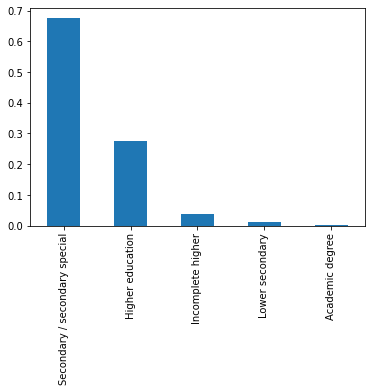

In [18]:
education_prop.plot.bar()

In [19]:
income = application_rec['AMT_INCOME_TOTAL'].value_counts(normalize=True)
income

135000.0    0.116003
180000.0    0.088180
157500.0    0.080603
112500.0    0.079235
225000.0    0.078948
              ...   
51750.0     0.000009
89550.0     0.000006
594000.0    0.000005
134995.5    0.000003
151200.0    0.000003
Name: AMT_INCOME_TOTAL, Length: 265, dtype: float64

# Creating the target variable (delinquent or not) based on STATUS of customers

In [20]:
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- MONTHS_BALANCE: integer (nullable = true)
 |-- STATUS: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)



In [21]:
# STATUS>=2 means the customer is 60-89 days overdue, hence delinquent
dff.select('STATUS').distinct().show()

+------+
|STATUS|
+------+
|     3|
|     0|
|     5|
|     C|
|     X|
|     1|
|     4|
|     2|
+------+



In [22]:
# Target variable- 0 means good(not delinquent) and 1 means bad(delinquent)
dff = dff.withColumn('target', when((col('STATUS')==2) | (col('STATUS')==3) | (col('STATUS')==4) | (col('STATUS')==5), 1).otherwise(0))

In [23]:
dff.select('target').distinct().show()

+------+
|target|
+------+
|     1|
|     0|
+------+



In [24]:
# Delinquent customers (bad customers)
delinquent = dff.filter(dff['target']==1).select('target','ID').distinct()
delinquent.show()

+------+-------+
|target|     ID|
+------+-------+
|     1|5041415|
|     1|5149042|
|     1|5045495|
|     1|5100111|
|     1|5116915|
|     1|5149192|
|     1|5009480|
|     1|5068779|
|     1|5096527|
|     1|5126300|
|     1|5024430|
|     1|5038807|
|     1|5085623|
|     1|5117723|
|     1|5096069|
|     1|5142964|
|     1|5143374|
|     1|5021314|
|     1|5065313|
|     1|5065316|
+------+-------+
only showing top 20 rows



In [25]:
# Non- delinquent customers (good customers)
non_delinquent = dff.filter(dff['target']==0).select('target','ID').distinct()
non_delinquent.show()

+------+-------+
|target|     ID|
+------+-------+
|     0|5009618|
|     0|5009986|
|     0|5021510|
|     0|5022116|
|     0|5022248|
|     0|5022383|
|     0|5022554|
|     0|5023249|
|     0|5023324|
|     0|5023417|
|     0|5023718|
|     0|5023879|
|     0|5023949|
|     0|5024086|
|     0|5024302|
|     0|5024663|
|     0|5024664|
|     0|5024951|
|     0|5026149|
|     0|5028456|
+------+-------+
only showing top 20 rows



In [26]:
delinquent.count()

616

In [27]:
non_delinquent.count()


36457

There are more good customers(36457) than bad customers(616)


In [28]:
# Dropping the columns Months_balance and Status as they have been utilised to create the target the target variable
dff = dff.drop('MONTHS_BALANCE','STATUS')
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- target: integer (nullable = false)



In [29]:
dff.distinct().count()

37073

In [30]:
dff = dff.dropDuplicates()
dff.count()

37073

In [31]:
dff.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+--------------------+---------------+------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|     OCCUPATION_TYPE|CNT_FAM_MEMBERS|target|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+--------------------+---------------+------+
|5009033|          F|           N|              N|           0|        255150.0|           Pensioner|   Incomplete higher|      Civil marriage| Rented apartment

## Creating AGE column using the DAYS_BIRTH column

In [32]:
dff = dff.withColumn('AGE', round(dff['DAYS_BIRTH']/365*(-1)))

In [33]:
dff.show(5)

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_BIRTH|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|target| AGE|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+----------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+
|5009033|          F|           N|              N|           0|        255150.0|           Pensioner|   Incomplete higher|      Civil marriage| Rented apartment

In [34]:
# Dropping the DAYS_BIRTH column
dff = dff.drop('DAYS_BIRTH')
dff.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+--------------------+---------------+------+----+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|     OCCUPATION_TYPE|CNT_FAM_MEMBERS|target| AGE|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+--------------------+---------------+------+----+
|5009033|          F|           N|              N|           0|        255150.0|           Pensioner|   Incomplete higher|      Civil marriage| Rented apartment|       365243|   

In [35]:
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- target: integer (nullable = false)
 |-- AGE: double (nullable = true)



### Proportion of females in the applicant customer base

In [36]:
dff.groupby('code_gender').count().show()

+-----------+-----+
|code_gender|count|
+-----------+-----+
|          F|24809|
|          M|12264|
+-----------+-----+



In [37]:
application_records = dff.toPandas()
application_records

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,AGE
0,5009033,F,N,N,0,255150.0,Pensioner,Incomplete higher,Civil marriage,Rented apartment,365243,1,0,0,0,None,2.0,0,51.0
1,5009304,F,N,N,0,112500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,365243,1,0,0,0,None,1.0,0,60.0
2,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-5273,1,1,1,0,Laborers,2.0,0,54.0
3,5009429,M,N,N,0,198000.0,Working,Secondary / secondary special,Single / not married,With parents,-1164,1,1,0,0,Laborers,1.0,0,24.0
4,5010070,F,N,Y,0,279000.0,State servant,Higher education,Single / not married,House / apartment,-617,1,0,0,1,Managers,1.0,0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37068,5149419,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,-7077,1,0,1,0,Core staff,2.0,0,59.0
37069,5149601,F,N,Y,0,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-229,1,1,0,0,None,2.0,0,49.0
37070,5149751,F,N,Y,1,180000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-3850,1,0,1,0,Medicine staff,2.0,0,37.0
37071,5150004,M,Y,Y,1,225000.0,Working,Higher education,Separated,Municipal apartment,-2055,1,0,1,0,Security staff,2.0,0,47.0


In [38]:
total = dff.select('code_gender').count()
total

37073

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

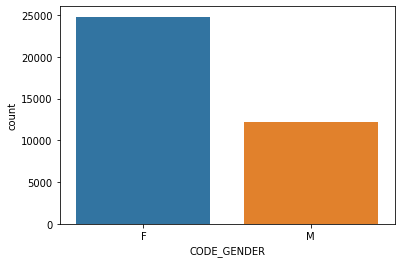

In [39]:
sns.countplot(data = application_records, x='CODE_GENDER')

<AxesSubplot:>

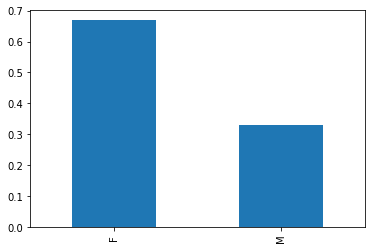

In [40]:
gender_prop = application_records['CODE_GENDER'].value_counts(normalize=True)
gender_prop.plot.bar()

Female proportion is higher than male proportion in the applicant customer base

### Homeownership among male applicants and female applicants

In [41]:
dff.groupby('FLAG_OWN_REALTY').count().show()

+---------------+-----+
|FLAG_OWN_REALTY|count|
+---------------+-----+
|              Y|24871|
|              N|12202|
+---------------+-----+



In [42]:
dff.filter(dff['flag_own_realty']=='Y').count()

24871

In [43]:
dff.filter(dff['flag_own_realty']=='Y').groupby('code_gender').count().show()

+-----------+-----+
|code_gender|count|
+-----------+-----+
|          F|17067|
|          M| 7804|
+-----------+-----+



In [44]:
homeownership = dff.filter(dff['flag_own_realty']=='Y').groupby('code_gender').count()
homeownership = homeownership.toPandas()

<BarContainer object of 2 artists>

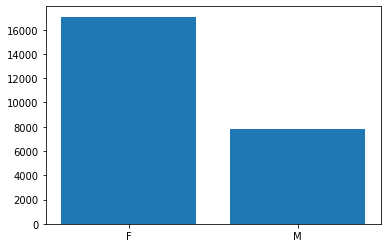

In [45]:
plt.bar(homeownership['code_gender'], homeownership['count'])

Homeownership among female members is higher than that in male members

### Correlation between the customer's income level and education level

In [46]:
dff.dtypes

[('ID', 'int'),
 ('CODE_GENDER', 'string'),
 ('FLAG_OWN_CAR', 'string'),
 ('FLAG_OWN_REALTY', 'string'),
 ('CNT_CHILDREN', 'int'),
 ('AMT_INCOME_TOTAL', 'double'),
 ('NAME_INCOME_TYPE', 'string'),
 ('NAME_EDUCATION_TYPE', 'string'),
 ('NAME_FAMILY_STATUS', 'string'),
 ('NAME_HOUSING_TYPE', 'string'),
 ('DAYS_EMPLOYED', 'int'),
 ('FLAG_MOBIL', 'int'),
 ('FLAG_WORK_PHONE', 'int'),
 ('FLAG_PHONE', 'int'),
 ('FLAG_EMAIL', 'int'),
 ('OCCUPATION_TYPE', 'string'),
 ('CNT_FAM_MEMBERS', 'double'),
 ('target', 'int'),
 ('AGE', 'double')]

In [47]:
numerical_features = [t[0] for t in dff.dtypes if t[1] == 'int' or t[1]=='double']
df_numeric = dff.select(numerical_features).describe().toPandas().transpose()

In [48]:
df_numeric

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,37073,5078309.728913225,41888.57701728924,5008804,5150487
CNT_CHILDREN,37073,0.43028619210746366,0.7423555652578169,0,19
AMT_INCOME_TOTAL,37073,186672.09548728185,101718.37229069641,27000.0,1575000.0
DAYS_EMPLOYED,37073,59361.74593369838,137730.5881819515,-15713,365243
FLAG_MOBIL,37073,1.0,0.0,1,1
FLAG_WORK_PHONE,37073,0.22582472419280877,0.41812992482962613,0,1
FLAG_PHONE,37073,0.2949046475871928,0.45600603657517297,0,1
FLAG_EMAIL,37073,0.08963396541957759,0.28566049565395685,0,1
CNT_FAM_MEMBERS,37073,2.1977989372319477,0.912061028219706,1.0,20.0


In [49]:
numerical_features

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'target',
 'AGE']

In [50]:
df = dff.select(['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'AGE','target']).toPandas()
df.head(10)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,target
0,5009033,0,255150.0,365243,0,0,0,2.0,51.0,0
1,5009304,0,112500.0,365243,0,0,0,1.0,60.0,0
2,5009355,0,135000.0,-5273,1,1,0,2.0,54.0,0
3,5009429,0,198000.0,-1164,1,0,0,1.0,24.0,0
4,5010070,0,279000.0,-617,0,0,1,1.0,30.0,0
5,5010236,0,225000.0,-4331,0,0,0,2.0,45.0,0
6,5010338,0,216000.0,365243,0,0,0,2.0,63.0,0
7,5010511,1,157500.0,-4239,0,0,0,3.0,38.0,0
8,5010624,0,103500.0,365243,0,1,0,2.0,61.0,0
9,5010629,0,180000.0,-2017,0,0,0,1.0,53.0,0


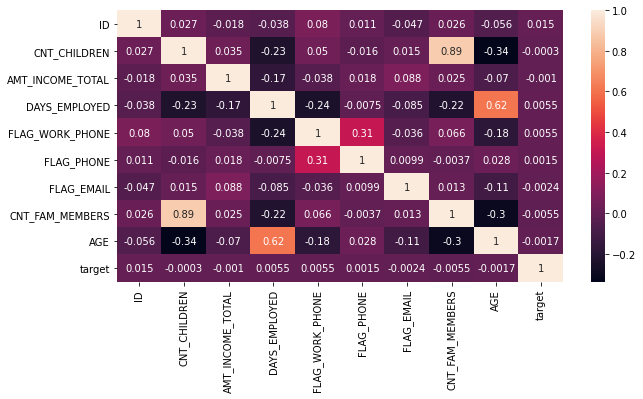

In [51]:
# Generating the correlation matrix for all numerical features
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see, there are high negative correlations present in DAYS_EMPLOYED, AMT_INCOME_TOTAL, AGE, CNT_FAM_MEMBERS

In [52]:
dff.select('NAME_EDUCATION_TYPE').distinct().show()

+--------------------+
| NAME_EDUCATION_TYPE|
+--------------------+
|     Academic degree|
|   Incomplete higher|
|Secondary / secon...|
|     Lower secondary|
|    Higher education|
+--------------------+



In [53]:
# Comverting ordinal categorial variable to numerical type for correlation matrix
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

indexer = StringIndexer(inputCol="NAME_EDUCATION_TYPE", outputCol="NAME_EDUCATION_TYPE_INDEX")
indexed = indexer.fit(dff).transform(dff)
indexed.show()

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+--------------------+---------------+------+----+-------------------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|     OCCUPATION_TYPE|CNT_FAM_MEMBERS|target| AGE|NAME_EDUCATION_TYPE_INDEX|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+--------------------+---------------+------+----+-------------------------+
|5009033|          F|           N|              N|           0|        255150.0|           Pensioner

In [54]:
indexed.select('NAME_EDUCATION_TYPE_INDEX','NAME_EDUCATION_TYPE').distinct().show()

+-------------------------+--------------------+
|NAME_EDUCATION_TYPE_INDEX| NAME_EDUCATION_TYPE|
+-------------------------+--------------------+
|                      3.0|     Lower secondary|
|                      4.0|     Academic degree|
|                      2.0|   Incomplete higher|
|                      1.0|    Higher education|
|                      0.0|Secondary / secon...|
+-------------------------+--------------------+



In [55]:
df_indexed = indexed.toPandas()

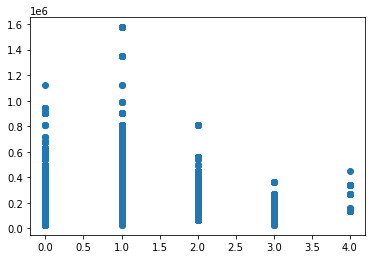

In [56]:
plt.scatter(df_indexed['NAME_EDUCATION_TYPE_INDEX'],df_indexed['AMT_INCOME_TOTAL'])

Customers with a higher education have the greatest total income

### The average and median salary of the applicant base

In [57]:
# Mean of the total income
dff.select('AMT_INCOME_TOTAL').describe().show()

+-------+------------------+
|summary|  AMT_INCOME_TOTAL|
+-------+------------------+
|  count|             37073|
|   mean|186672.09548728185|
| stddev|101718.37229069641|
|    min|           27000.0|
|    max|         1575000.0|
+-------+------------------+



In [58]:
df_income = dff.select('AMT_INCOME_TOTAL').toPandas()
df_income

,AMT_INCOME_TOTAL
0,255150.0
1,112500.0
2,135000.0
3,198000.0
4,279000.0
...,...
37068,202500.0
37069,225000.0
37070,180000.0
37071,225000.0


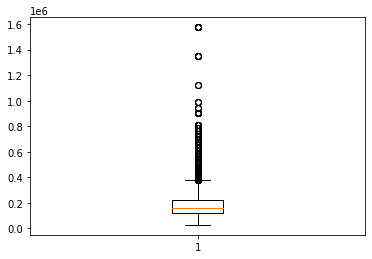

In [59]:
# Creating a boxplot for income to check for outliers
plt.boxplot(df_income)
plt.show()

In [60]:
import statistics
# Median of the total income using statistics library
statistics.median(application_records['AMT_INCOME_TOTAL'])

157500.0

The average of salary is 186672 and median is 15700.0


In [61]:
# Checking quantiles in income
df_income.quantile([0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 1])

,AMT_INCOME_TOTAL
0.010,54000.0
0.100,90000.0
0.200,112500.0
0.300,135000.0
0.500,157500.0
0.700,216000.0
0.900,315000.0
0.950,360000.0
0.990,560250.0
0.999,900000.0


There are few outliers present in income column. 99% of income lies within the range 900000. 

In [62]:
df_income[df_income['AMT_INCOME_TOTAL'] > df_income['AMT_INCOME_TOTAL'].quantile(0.99)].shape

(368, 1)

### Proportion of good and bad customers who own cars 

In [63]:
dff.select('flag_own_car').distinct().show()

+------------+
|flag_own_car|
+------------+
|           Y|
|           N|
+------------+



In [64]:
dff.filter(dff['flag_own_car']=='Y').count()

14067

In [65]:
car_owners = dff.filter(dff['flag_own_car']=='Y').groupby('target').count()
car_owners.show()

+------+-----+
|target|count|
+------+-----+
|     1|  224|
|     0|13843|
+------+-----+



In [66]:
car_owners = car_owners.withColumn('Customer Type', when(col('target')==1,'bad').otherwise('good'))
car_owners.show()

+------+-----+-------------+
|target|count|Customer Type|
+------+-----+-------------+
|     1|  224|          bad|
|     0|13843|         good|
+------+-----+-------------+



In [67]:
car_owners = car_owners.toPandas()

<BarContainer object of 2 artists>

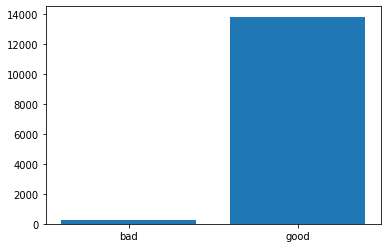

In [68]:
plt.bar(car_owners['Customer Type'],car_owners['count'])

Proportion of good customers who own car is higher than that of bad customers

### Proportion of bad customers living on rent compared to the rest of the population

In [69]:
housing_type = dff.groupby('NAME_HOUSING_TYPE').count().show()

+-------------------+-----+
|  NAME_HOUSING_TYPE|count|
+-------------------+-----+
|  House / apartment|33088|
|Municipal apartment| 1158|
|    Co-op apartment|  171|
|   Rented apartment|  583|
|   Office apartment|  271|
|       With parents| 1802|
+-------------------+-----+



In [70]:
housing = dff.filter(dff['NAME_HOUSING_TYPE']=='Rented apartment').groupby('target').count().show()

+------+-----+
|target|count|
+------+-----+
|     1|    8|
|     0|  575|
+------+-----+



Proportion of bad customers living on rented apartments is not higher than the rest of the population

### Proportion of bad customers for single customers v/s married customers

In [71]:
df_pandas = dff.toPandas()

In [72]:
# Finding the distribution of good and bad customers for various categories of NAME_FAMILY_STATUS
pd.crosstab(index=df_pandas['NAME_FAMILY_STATUS'], columns=df_pandas['target'], margins = True)

target,0,1,All
NAME_FAMILY_STATUS,,,
Civil marriage,2945,46,2991
Married,25048,393,25441
Separated,2103,31,2134
Single / not married,4829,101,4930
Widow,1532,45,1577
All,36457,616,37073


Single customers who are delinquent(bad-1) are 101 out of total 4930 single customers.
Married customers who are delinquent(bad-1) are 393 out of total 25441 married customers.

In [73]:
marital_status = dff.groupby(dff['NAME_FAMILY_STATUS']).count()
marital_status.show()

+--------------------+-----+
|  NAME_FAMILY_STATUS|count|
+--------------------+-----+
|           Separated| 2134|
|             Married|25441|
|Single / not married| 4930|
|               Widow| 1577|
|      Civil marriage| 2991|
+--------------------+-----+



In [74]:
marital_status.filter(marital_status['NAME_FAMILY_STATUS']=='Single / not married').show()

+--------------------+-----+
|  NAME_FAMILY_STATUS|count|
+--------------------+-----+
|Single / not married| 4930|
+--------------------+-----+



In [75]:
marital_status.filter(marital_status['NAME_FAMILY_STATUS']=='Married').show()

+------------------+-----+
|NAME_FAMILY_STATUS|count|
+------------------+-----+
|           Married|25441|
+------------------+-----+



In [76]:
single_target = dff.filter(dff['NAME_FAMILY_STATUS']=='Single / not married').groupby('target').count()
single_target.show()

+------+-----+
|target|count|
+------+-----+
|     1|  101|
|     0| 4829|
+------+-----+



In [77]:
single_target.withColumn('proportion', col('count')/4930).show()

+------+-----+------------------+
|target|count|        proportion|
+------+-----+------------------+
|     1|  101|0.0204868154158215|
|     0| 4829|0.9795131845841785|
+------+-----+------------------+



In [78]:
married_target = dff.filter(dff['NAME_FAMILY_STATUS']=='Married').groupby('target').count()
married_target.show()

+------+-----+
|target|count|
+------+-----+
|     1|  393|
|     0|25048|
+------+-----+



In [79]:
married_target.withColumn('proportion', col('count')/25441).show()

+------+-----+--------------------+
|target|count|          proportion|
+------+-----+--------------------+
|     1|  393|0.015447505994261233|
|     0|25048|  0.9845524940057387|
+------+-----+--------------------+



Proportion of single bad customers (0.02) is comparable to that of married bad customers (0.015) with the former being a little higher than the latter.

## Handling NULL values

In [80]:
# Checking for null values in all columns of dataset
dff.select([count(when(isnull(c), c)).alias(c) for c in dff.columns]).show()

+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+---+
| ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|NAME_INCOME_TYPE|NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|target|AGE|
+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+---+
|  0|          0|           0|              0|           0|               0|               0|                  0|                 0|                0|            0|         0|              0|         0|         0|          11517|

Only occupation has null values.

In [81]:
dff.select('OCCUPATION_TYPE').distinct().show()

+--------------------+
|     OCCUPATION_TYPE|
+--------------------+
|                null|
|            Managers|
|            HR staff|
|      Medicine staff|
|         Accountants|
|            Laborers|
|      Cleaning staff|
|Private service s...|
|             Drivers|
|         Sales staff|
|       Realty agents|
|            IT staff|
|      Security staff|
|         Secretaries|
|  Low-skill Laborers|
|          Core staff|
|       Cooking staff|
|High skill tech s...|
|Waiters/barmen staff|
+--------------------+



In [82]:
dff.groupby('OCCUPATION_TYPE').count().show()

+--------------------+-----+
|     OCCUPATION_TYPE|count|
+--------------------+-----+
|                null|11517|
|            Managers| 3059|
|            HR staff|   86|
|      Medicine staff| 1217|
|         Accountants| 1264|
|            Laborers| 6310|
|      Cleaning staff|  556|
|Private service s...|  346|
|             Drivers| 2187|
|         Sales staff| 3530|
|       Realty agents|   79|
|            IT staff|   63|
|      Security staff|  605|
|         Secretaries|  153|
|  Low-skill Laborers|  183|
|          Core staff| 3665|
|       Cooking staff|  664|
|High skill tech s...| 1413|
|Waiters/barmen staff|  176|
+--------------------+-----+



In [83]:
# Removing the null rows in OCCUPATION as they have the largest proportion of occupations
dff = dff.dropna(subset = 'OCCUPATION_TYPE')

In [84]:
dff.select('OCCUPATION_TYPE').distinct().show()

+--------------------+
|     OCCUPATION_TYPE|
+--------------------+
|            Managers|
|            HR staff|
|      Medicine staff|
|         Accountants|
|            Laborers|
|      Cleaning staff|
|Private service s...|
|             Drivers|
|         Sales staff|
|       Realty agents|
|            IT staff|
|      Security staff|
|         Secretaries|
|  Low-skill Laborers|
|          Core staff|
|       Cooking staff|
|High skill tech s...|
|Waiters/barmen staff|
+--------------------+



## Separating categorical variables form numerical variables

In [85]:
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- target: integer (nullable = false)
 |-- AGE: double (nullable = true)



In [86]:
dff.count()

25556

In [87]:
cat_var = dff.select('CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'
                    ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE')
num_var = numerical_features

In [88]:
num_var

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'target',
 'AGE']

In [89]:
dff.show(5)

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|target| AGE|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+
|5009355|          F|           N|              N|           0|        135000.0|Commercial associate|Secondary / secon...|             Married|House / apartment|        -5273|         1|       

## Variable Transformation using WOE and IV

In [90]:
df_pandas=dff.toPandas()

In [91]:
df_pandas

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,AGE
0,5009355,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-5273,1,1,1,0,Laborers,2.0,0,54.0
1,5009429,M,N,N,0,198000.0,Working,Secondary / secondary special,Single / not married,With parents,-1164,1,1,0,0,Laborers,1.0,0,24.0
2,5010070,F,N,Y,0,279000.0,State servant,Higher education,Single / not married,House / apartment,-617,1,0,0,1,Managers,1.0,0,30.0
3,5010236,M,Y,Y,0,225000.0,Working,Secondary / secondary special,Married,House / apartment,-4331,1,0,0,0,Drivers,2.0,0,45.0
4,5010511,F,Y,Y,1,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-4239,1,0,0,0,Laborers,3.0,0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25551,5148745,F,Y,Y,0,157500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-533,1,0,0,0,Medicine staff,2.0,0,51.0
25552,5149419,F,N,Y,0,202500.0,Working,Higher education,Married,House / apartment,-7077,1,0,1,0,Core staff,2.0,0,59.0
25553,5149751,F,N,Y,1,180000.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-3850,1,0,1,0,Medicine staff,2.0,0,37.0
25554,5150004,M,Y,Y,1,225000.0,Working,Higher education,Separated,Municipal apartment,-2055,1,0,1,0,Security staff,2.0,0,47.0


In [92]:
# Good (0) and Bad(1) customers based on Code_Gender
df_gender = pd.crosstab(index=df_pandas['CODE_GENDER'], columns=df_pandas['target'], margins = True)
df_gender

target,0,1,All
CODE_GENDER,,,
F,15630,230,15860
M,9504,192,9696
All,25134,422,25556


In [93]:
# Good female customers
df_gender[0][0]

15630

In [94]:
# Good male customers
df_gender[0][2]

25134

In [95]:
# Distribution of good customers for females
df_gender['proportion_good']= df_gender[0][0]/df_gender[0][2]

In [96]:
# Distribution of good customers for males
df_gender['proportion_good'][1] =df_gender[0][1]/df_gender[0][2]

In [97]:
df_gender['proportion_good'][2] = 0

In [98]:
# Distribution of bad customers for females
df_gender['proportion_bad'] = df_gender[1][0]/df_gender[1][2]

In [99]:
# Distribution of bad customers for males
df_gender['proportion_bad'][1] = df_gender[1][1]/df_gender[1][2]

In [100]:
df_gender['proportion_bad'][2] = 0

In [101]:
df_gender

target,0,1,All,proportion_good,proportion_bad
CODE_GENDER,,,,,
F,15630,230,15860,0.621867,0.545024
M,9504,192,9696,0.378133,0.454976
All,25134,422,25556,0.000000,0.000000


In [102]:
# Calculating WOE for code_gender
df_gender['WOE'] = np.log(df_gender['proportion_good'][0])-np.log(df_gender['proportion_bad'][0])
for i in range(df_gender.index.size-1):
    df_gender['WOE'][1] = np.log(df_gender['proportion_good'][i])-np.log(df_gender['proportion_bad'][i])  
    
df_gender['WOE'][2] = 0

In [103]:
df_gender

target,0,1,All,proportion_good,proportion_bad,WOE
CODE_GENDER,,,,,,
F,15630,230,15860,0.621867,0.545024,0.131897
M,9504,192,9696,0.378133,0.454976,-0.184999
All,25134,422,25556,0.000000,0.000000,0.000000


In [104]:
# Calculating IV
df_gender['IV'] = df_gender['WOE'][0]*(df_gender['proportion_good'][0]-df_gender['proportion_bad'][0])
for i in range(df_gender.index.size-1):
    df_gender['IV'][i] = df_gender['WOE'][i]*(df_gender['proportion_good'][i]-df_gender['proportion_bad'][i])
    
df_gender['IV'][2] = df_gender['IV'][0] + df_gender['IV'][1]

In [105]:
df_gender['IV']

CODE_GENDER
F      0.010135
M      0.014216
All    0.024351
Name: IV, dtype: float64

In [106]:
df_gender

target,0,1,All,proportion_good,proportion_bad,WOE,IV
CODE_GENDER,,,,,,,
F,15630,230,15860,0.621867,0.545024,0.131897,0.010135
M,9504,192,9696,0.378133,0.454976,-0.184999,0.014216
All,25134,422,25556,0.000000,0.000000,0.000000,0.024351


Since the total IV is 0.0243, which is greater than the threshold 0.002, we will use the code_gender variable in our model

In [107]:
# Good (0) and Bad(1) customers based on FLAG_OWN_REALTY
df_property = pd.crosstab(index=df_pandas['FLAG_OWN_REALTY'], columns=df_pandas['target'], margins = True)
df_property

target,0,1,All
FLAG_OWN_REALTY,,,
N,8673,179,8852
Y,16461,243,16704
All,25134,422,25556


In [108]:
# Distribution of good for those who don't own a property
df_property['proportion_good'] = df_property[0][0]/df_property[0][2]

In [109]:
# Distribution of good for those who own a property
df_property['proportion_good'][1] =df_property[0][1]/df_property[0][2]

In [110]:
# Distribution of bad for those who don't own a property
df_property['proportion_bad'] = df_property[1][0]/df_property[1][2]

In [111]:
# Distribution of bad for those who own a property
df_property['proportion_bad'][1] = df_property[1][1]/df_property[1][2]

In [112]:
df_property['proportion_bad'][2] = 0
df_property['proportion_good'][2] = 0

In [113]:
df_property

target,0,1,All,proportion_good,proportion_bad
FLAG_OWN_REALTY,,,,,
N,8673,179,8852,0.34507,0.424171
Y,16461,243,16704,0.65493,0.575829
All,25134,422,25556,0.00000,0.000000


In [114]:
# Calculating WOE for flag_own_realty
df_property['WOE'] = np.log(df_property['proportion_good'][0])-np.log(df_property['proportion_bad'][0])
for i in range(df_property.index.size-1):
    df_property['WOE'][1] = np.log(df_property['proportion_good'][i])-np.log(df_property['proportion_bad'][i])  
    
df_property['WOE'][2] = 0

In [115]:
# Calculating IV
df_property['IV'] = df_property['WOE'][0]*(df_property['proportion_good'][0]-df_property['proportion_bad'][0])
for i in range(df_property.index.size-1):
    df_property['IV'][1] = df_property['WOE'][1]*(df_property['proportion_good'][1]-df_property['proportion_bad'][1])
    
df_property['IV'][2] = df_property['IV'][0] + df_property['IV'][1]

In [116]:
df_property

target,0,1,All,proportion_good,proportion_bad,WOE,IV
FLAG_OWN_REALTY,,,,,,,
N,8673,179,8852,0.34507,0.424171,-0.206387,0.016325
Y,16461,243,16704,0.65493,0.575829,0.128716,0.010181
All,25134,422,25556,0.00000,0.000000,0.000000,0.026507


Since the total IV is 0.026, which is greater than the threshold 0.002, we will use the property variable in our model

In [117]:
# Good (0) and Bad(1) customers based on FLAG_OWN_CAR
df_car = pd.crosstab(index=df_pandas['FLAG_OWN_CAR'], columns=df_pandas['target'], margins = True)
df_car

target,0,1,All
FLAG_OWN_CAR,,,
N,14618,245,14863
Y,10516,177,10693
All,25134,422,25556


In [118]:
# Distribution of good for those who don't own a car
df_car['proportion_good'] = df_car[0][0]/df_car[0][2]

# Distribution of good for those who own a car
df_car['proportion_good'][1] =df_car[0][1]/df_car[0][2]

# Distribution of bad for those who don't own a car
df_car['proportion_bad'] = df_car[1][0]/df_car[1][2]

# Distribution of bad for those who own a car
df_car['proportion_bad'][1] = df_car[1][1]/df_car[1][2]

df_car['proportion_bad'][2] = 0
df_car['proportion_good'][2] = 0

df_car

target,0,1,All,proportion_good,proportion_bad
FLAG_OWN_CAR,,,,,
N,14618,245,14863,0.581603,0.580569
Y,10516,177,10693,0.418397,0.419431
All,25134,422,25556,0.000000,0.000000


In [119]:
# Calculating WOE for flag_own_car
df_car['WOE'] = np.log(df_car['proportion_good'][0])-np.log(df_car['proportion_bad'][0])
for i in range(1,df_car.index.size-1):
    df_car['WOE'][i] = np.log(df_car['proportion_good'][i])-np.log(df_car['proportion_bad'][i])  
    
df_car['WOE'][2] = 0

# Calculating IV
df_car['IV'] = df_car['WOE'][0]*(df_car['proportion_good'][0]-df_car['proportion_bad'][0])
for i in range(1,df_car.index.size-1):
    df_car['IV'][1] = df_car['WOE'][1]*(df_car['proportion_good'][1]-df_car['proportion_bad'][1])
    
df_car['IV'][2] = df_car['IV'][0] + df_car['IV'][1]

In [120]:
df_car

target,0,1,All,proportion_good,proportion_bad,WOE,IV
FLAG_OWN_CAR,,,,,,,
N,14618,245,14863,0.581603,0.580569,0.001779,0.000002
Y,10516,177,10693,0.418397,0.419431,-0.002468,0.000003
All,25134,422,25556,0.000000,0.000000,0.000000,0.000004


Since the total IV is 0.000, which is far lesser than the threshold 0.002, we will not use the car variable in our model

In [121]:
# Good (0) and Bad(1) customers based on NAME_INCOME_TYPE
df_income = pd.crosstab(index=df_pandas['NAME_INCOME_TYPE'], columns=df_pandas['target'], margins = True)
df_income

target,0,1,All
NAME_INCOME_TYPE,,,
Commercial associate,7052,119,7171
Pensioner,13,13,26
State servant,2437,29,2466
Student,10,0,10
Working,15622,261,15883
All,25134,422,25556


In [122]:
df_income.index.size-1

5

In [123]:
df_income[0]

NAME_INCOME_TYPE
Commercial associate     7052
Pensioner                  13
State servant            2437
Student                    10
Working                 15622
All                     25134
Name: 0, dtype: int64

In [124]:
#Proportion of good customers for all income types
df_income['proportion_good'] = ''
for j in range(0,df_income.index.size-1):
    df_income['proportion_good'][j]=df_income[0][j]/df_income[0][df_income.index.size-1]
    
#Poportion of bad customers for all income types
df_income['proportion_bad'] = ''
for j in range(0,df_income.index.size-1):
    df_income['proportion_bad'][j]=df_income[1][j]/df_income[1][df_income.index.size-1]


In [125]:
df_income

target,0,1,All,proportion_good,proportion_bad
NAME_INCOME_TYPE,,,,,
Commercial associate,7052,119,7171,0.280576,0.281991
Pensioner,13,13,26,0.000517,0.030806
State servant,2437,29,2466,0.09696,0.06872
Student,10,0,10,0.000398,0.0
Working,15622,261,15883,0.621549,0.618483
All,25134,422,25556,,


In [126]:
# Calculating WOE for income_type
df_income['WOE'] = np.log(df_income['proportion_good'][0])-np.log(df_income['proportion_bad'][0])
for i in range(1,df_income.index.size-1):
    df_income['WOE'][i] = np.log(df_income['proportion_good'][i])-np.log(df_income['proportion_bad'][i])  
    
df_income['WOE'][df_income.index.size-1] = 0

# Calculating IV
df_income['IV'] = df_income['WOE'][0]*(df_income['proportion_good'][0]-df_income['proportion_bad'][0])
for i in range(1,df_income.index.size-1):
    df_income['IV'][i] = df_income['WOE'][i]*(df_income['proportion_good'][i]-df_income['proportion_bad'][i])
    
df_income['IV'][df_income.index.size-1] = df_income['IV'][0] + df_income['IV'][1] + df_income['IV'][2] + df_income['IV'][3] + df_income['IV'][4]

In [127]:
df_income

target,0,1,All,proportion_good,proportion_bad,WOE,IV
NAME_INCOME_TYPE,,,,,,,
Commercial associate,7052,119,7171,0.280576,0.281991,-0.005028,0.000007
Pensioner,13,13,26,0.000517,0.030806,-4.086971,0.123788
State servant,2437,29,2466,0.09696,0.06872,0.344256,0.009722
Student,10,0,10,0.000398,0.0,inf,inf
Working,15622,261,15883,0.621549,0.618483,0.004944,0.000015
All,25134,422,25556,,,0.000000,inf


Since IV here is infinite because of Student type, we will further analyse this variable after removing student

In [128]:
# Good (0) and Bad(1) customers based on FLAG_OWN_CAR
df_education = pd.crosstab(index=df_pandas['NAME_EDUCATION_TYPE'], columns=df_pandas['target'], margins = True)
df_education

target,0,1,All
NAME_EDUCATION_TYPE,,,
Academic degree,14,0,14
Higher education,7132,128,7260
Incomplete higher,993,21,1014
Lower secondary,187,6,193
Secondary / secondary special,16808,267,17075
All,25134,422,25556


In [129]:
#Proportion of good customers for all education types
df_education['proportion_good'] = ''
for j in range(0,df_education.index.size-1):
    df_education['proportion_good'][j]=df_education[0][j]/df_education[0][df_education.index.size-1]
    
#Poportion of bad customers for all education types
df_education['proportion_bad'] = ''
for j in range(0,df_education.index.size-1):
    df_education['proportion_bad'][j]=df_education[1][j]/df_education[1][df_education.index.size-1]

In [130]:
df_education

target,0,1,All,proportion_good,proportion_bad
NAME_EDUCATION_TYPE,,,,,
Academic degree,14,0,14,0.000557,0.0
Higher education,7132,128,7260,0.283759,0.303318
Incomplete higher,993,21,1014,0.039508,0.049763
Lower secondary,187,6,193,0.00744,0.014218
Secondary / secondary special,16808,267,17075,0.668736,0.632701
All,25134,422,25556,,


In [131]:
# Calculating WOE for education type
df_education['WOE'] = np.log(df_education['proportion_good'][0])-np.log(df_education['proportion_bad'][0])
for i in range(1,df_education.index.size-1):
    df_education['WOE'][i] = np.log(df_education['proportion_good'][i])-np.log(df_education['proportion_bad'][i])  
    
df_education['WOE'][df_education.index.size-1] = 0

# Calculating IV
df_education['IV'] = df_education['WOE'][0]*(df_education['proportion_good'][0]-df_education['proportion_bad'][0])
for i in range(1,df_income.index.size-1):
    df_education['IV'][i] = df_education['WOE'][i]*(df_education['proportion_good'][i]-df_education['proportion_bad'][i])
    
df_education['IV'][df_education.index.size-1] = df_education['IV'][0] + df_education['IV'][1] + df_education['IV'][2] + df_education['IV'][3] + df_education['IV'][4]

In [132]:
df_education

target,0,1,All,proportion_good,proportion_bad,WOE,IV
NAME_EDUCATION_TYPE,,,,,,,
Academic degree,14,0,14,0.000557,0.0,inf,inf
Higher education,7132,128,7260,0.283759,0.303318,-0.066655,0.001304
Incomplete higher,993,21,1014,0.039508,0.049763,-0.230763,0.002366
Lower secondary,187,6,193,0.00744,0.014218,-0.647622,0.004390
Secondary / secondary special,16808,267,17075,0.668736,0.632701,0.055390,0.001996
All,25134,422,25556,,,0.000000,inf


We will remove the academic degree education type and then perform the analysis because customers with a academic degree have no delinquency

In [133]:
# Good (0) and Bad(1) customers based on FLAG_OWN_CAR
df_marital = pd.crosstab(index=df_pandas['NAME_FAMILY_STATUS'], columns=df_pandas['target'], margins = True)
df_marital

target,0,1,All
NAME_FAMILY_STATUS,,,
Civil marriage,2133,32,2165
Married,17509,277,17786
Separated,1467,15,1482
Single / not married,3445,83,3528
Widow,580,15,595
All,25134,422,25556


In [134]:
#Proportion of good customers for all family status types
df_marital['proportion_good'] = ''
for j in range(0,df_marital.index.size-1):
    df_marital['proportion_good'][j]=df_marital[0][j]/df_marital[0][df_marital.index.size-1]
    
#Poportion of bad customers for all family status types
df_marital['proportion_bad'] = ''
for j in range(0,df_marital.index.size-1):
    df_marital['proportion_bad'][j]=df_marital[1][j]/df_marital[1][df_marital.index.size-1]
    
df_marital

target,0,1,All,proportion_good,proportion_bad
NAME_FAMILY_STATUS,,,,,
Civil marriage,2133,32,2165,0.084865,0.075829
Married,17509,277,17786,0.696626,0.656398
Separated,1467,15,1482,0.058367,0.035545
Single / not married,3445,83,3528,0.137065,0.196682
Widow,580,15,595,0.023076,0.035545
All,25134,422,25556,,


In [135]:
# Calculating WOE for education type
df_marital['WOE'] = np.log(df_marital['proportion_good'][0])-np.log(df_marital['proportion_bad'][0])
for i in range(1,df_marital.index.size-1):
    df_marital['WOE'][i] = np.log(df_marital['proportion_good'][i])-np.log(df_marital['proportion_bad'][i])  
    
df_marital['WOE'][df_marital.index.size-1] = 0

# Calculating IV
df_marital['IV'] = df_marital['WOE'][0]*(df_marital['proportion_good'][0]-df_marital['proportion_bad'][0])
for i in range(1,df_marital.index.size-1):
    df_marital['IV'][i] = df_marital['WOE'][i]*(df_marital['proportion_good'][i]-df_marital['proportion_bad'][i])
    
df_marital['IV'][df_marital.index.size-1] = df_marital['IV'][0] + df_marital['IV'][1] + df_marital['IV'][2] + df_marital['IV'][3] + df_marital['IV'][4]

df_marital

target,0,1,All,proportion_good,proportion_bad,WOE,IV
NAME_FAMILY_STATUS,,,,,,,
Civil marriage,2133,32,2165,0.084865,0.075829,0.112577,0.001017
Married,17509,277,17786,0.696626,0.656398,0.059481,0.002393
Separated,1467,15,1482,0.058367,0.035545,0.495953,0.011319
Single / not married,3445,83,3528,0.137065,0.196682,-0.361133,0.021530
Widow,580,15,595,0.023076,0.035545,-0.431994,0.005386
All,25134,422,25556,,,0.000000,0.041645


Since the IV here is 0.041 which is greater than the threshold of 0.002, we will consider this variable in our model

In [136]:
# Good (0) and Bad(1) customers based on FLAG_OWN_CAR
df_housing = pd.crosstab(index=df_pandas['NAME_HOUSING_TYPE'], columns=df_pandas['target'], margins = True)
df_housing

target,0,1,All
NAME_HOUSING_TYPE,,,
Co-op apartment,152,3,155
House / apartment,22102,364,22466
Municipal apartment,812,19,831
Office apartment,199,5,204
Rented apartment,439,6,445
With parents,1430,25,1455
All,25134,422,25556


In [137]:
#Proportion of good customers for all housing types
df_housing['proportion_good'] = ''
for j in range(0,df_housing.index.size-1):
    df_housing['proportion_good'][j]=df_housing[0][j]/df_housing[0][df_housing.index.size-1]
    
#Poportion of bad customers for all housing types
df_housing['proportion_bad'] = ''
for j in range(0,df_housing.index.size-1):
    df_housing['proportion_bad'][j]=df_housing[1][j]/df_housing[1][df_housing.index.size-1]
    
df_housing

target,0,1,All,proportion_good,proportion_bad
NAME_HOUSING_TYPE,,,,,
Co-op apartment,152,3,155,0.006048,0.007109
House / apartment,22102,364,22466,0.879367,0.862559
Municipal apartment,812,19,831,0.032307,0.045024
Office apartment,199,5,204,0.007918,0.011848
Rented apartment,439,6,445,0.017466,0.014218
With parents,1430,25,1455,0.056895,0.059242
All,25134,422,25556,,


In [138]:
# Calculating WOE for housing type
df_housing['WOE'] = np.log(df_housing['proportion_good'][0])-np.log(df_housing['proportion_bad'][0])
for i in range(1,df_housing.index.size-1):
    df_housing['WOE'][i] = np.log(df_housing['proportion_good'][i])-np.log(df_housing['proportion_bad'][i])  
    
df_housing['WOE'][df_housing.index.size-1] = 0

# Calculating IV
df_housing['IV'] = df_housing['WOE'][0]*(df_housing['proportion_good'][0]-df_housing['proportion_bad'][0])
for i in range(1,df_housing.index.size-1):
    df_housing['IV'][i] = df_housing['WOE'][i]*(df_housing['proportion_good'][i]-df_housing['proportion_bad'][i])
    
df_housing['IV'][df_housing.index.size-1] = df_housing['IV'][0] + df_housing['IV'][1] + df_housing['IV'][2] + df_housing['IV'][3] + df_housing['IV'][4] + df_housing['IV'][5]

df_housing

target,0,1,All,proportion_good,proportion_bad,WOE,IV
NAME_HOUSING_TYPE,,,,,,,
Co-op apartment,152,3,155,0.006048,0.007109,-0.161703,0.000172
House / apartment,22102,364,22466,0.879367,0.862559,0.019298,0.000324
Municipal apartment,812,19,831,0.032307,0.045024,-0.331910,0.004221
Office apartment,199,5,204,0.007918,0.011848,-0.403105,0.001585
Rented apartment,439,6,445,0.017466,0.014218,0.205768,0.000668
With parents,1430,25,1455,0.056895,0.059242,-0.040418,0.000095
All,25134,422,25556,,,0.000000,0.007065


Since IV here is 0.007, which is greater than the threshold of 0.002, we will consider the housing variable in our model

In [139]:
# Good (0) and Bad(1) customers based on FLAG_OWN_CAR
df_occupation = pd.crosstab(index=df_pandas['OCCUPATION_TYPE'], columns=df_pandas['target'], margins = True)
df_occupation

target,0,1,All
OCCUPATION_TYPE,,,
Accountants,1241,23,1264
Cleaning staff,551,5,556
Cooking staff,655,9,664
Core staff,3591,74,3665
Drivers,2138,49,2187
HR staff,85,1,86
High skill tech staff,1383,30,1413
IT staff,60,3,63
Laborers,6211,99,6310


In [140]:
#Proportion of good customers for all occupation types
df_occupation['proportion_good'] = ''
for j in range(0,df_occupation.index.size-1):
    df_occupation['proportion_good'][j]=df_occupation[0][j]/df_occupation[0][df_occupation.index.size-1]
    
#Poportion of bad customers for all occupation types
df_occupation['proportion_bad'] = ''
for j in range(0,df_occupation.index.size-1):
    df_occupation['proportion_bad'][j]=df_occupation[1][j]/df_occupation[1][df_occupation.index.size-1]
    
df_occupation

target,0,1,All,proportion_good,proportion_bad
OCCUPATION_TYPE,,,,,
Accountants,1241,23,1264,0.049375,0.054502
Cleaning staff,551,5,556,0.021922,0.011848
Cooking staff,655,9,664,0.02606,0.021327
Core staff,3591,74,3665,0.142874,0.175355
Drivers,2138,49,2187,0.085064,0.116114
HR staff,85,1,86,0.003382,0.00237
High skill tech staff,1383,30,1413,0.055025,0.07109
IT staff,60,3,63,0.002387,0.007109
Laborers,6211,99,6310,0.247115,0.234597


In [141]:
# Calculating WOE for occupation type
df_occupation['WOE'] = np.log(df_occupation['proportion_good'][0])-np.log(df_occupation['proportion_bad'][0])
for i in range(1,df_occupation.index.size-1):
    df_occupation['WOE'][i] = np.log(df_occupation['proportion_good'][i])-np.log(df_occupation['proportion_bad'][i])  
    
df_occupation['WOE'][df_occupation.index.size-1] = 0

# Calculating IV
df_occupation['IV'] = df_occupation['WOE'][0]*(df_occupation['proportion_good'][0]-df_occupation['proportion_bad'][0])
for i in range(1,df_occupation.index.size-1):
    df_occupation['IV'][i] = df_occupation['WOE'][i]*(df_occupation['proportion_good'][i]-df_occupation['proportion_bad'][i])
    
df_occupation['IV'][df_occupation.index.size-1] = df_occupation['IV'][0] + df_occupation['IV'][1] + df_occupation['IV'][2] + df_occupation['IV'][3] + df_occupation['IV'][4] + df_occupation['IV'][5] + df_occupation['IV'][6]+ df_occupation['IV'][7] + df_occupation['IV'][8]+ df_occupation['IV'][9] + df_occupation['IV'][10]+ df_occupation['IV'][11]+ df_occupation['IV'][12]+ df_occupation['IV'][13]+ df_occupation['IV'][14]+ df_occupation['IV'][15]+ df_occupation['IV'][16]+ df_occupation['IV'][17]+ df_occupation['IV'][18]

df_occupation

target,0,1,All,proportion_good,proportion_bad,WOE,IV
OCCUPATION_TYPE,,,,,,,
Accountants,1241,23,1264,0.049375,0.054502,-0.098793,0.000507
Cleaning staff,551,5,556,0.021922,0.011848,0.615325,0.006199
Cooking staff,655,9,664,0.02606,0.021327,0.200439,0.000949
Core staff,3591,74,3665,0.142874,0.175355,-0.204851,0.006654
Drivers,2138,49,2187,0.085064,0.116114,-0.311166,0.009662
HR staff,85,1,86,0.003382,0.00237,0.355680,0.000360
High skill tech staff,1383,30,1413,0.055025,0.07109,-0.256159,0.004115
IT staff,60,3,63,0.002387,0.007109,-1.091239,0.005153
Laborers,6211,99,6310,0.247115,0.234597,0.051986,0.000651


Since the IV is infinite so we will remove the realty agents occupation from the dataset and then perform the analysis

## Replacing column values with WOE

In [142]:
cat_var

DataFrame[CODE_GENDER: string, FLAG_OWN_CAR: string, FLAG_OWN_REALTY: string, NAME_INCOME_TYPE: string, NAME_EDUCATION_TYPE: string, NAME_FAMILY_STATUS: string, NAME_HOUSING_TYPE: string, OCCUPATION_TYPE: string]

In [143]:
df_gender['WOE']

CODE_GENDER
F      0.131897
M     -0.184999
All    0.000000
Name: WOE, dtype: float64

In [144]:
dff = dff.withColumn('CODE_GENDER_WOE', when(col('CODE_GENDER')=='F',0.131897).otherwise(-0.184999))
dff.show(5)

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+---------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|target| AGE|CODE_GENDER_WOE|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+---------------+
|5009355|          F|           N|              N|           0|        135000.0|Commercial associate|Secondary / secon...|             Married|Ho

In [145]:
df_car['WOE']

FLAG_OWN_CAR
N      0.001779
Y     -0.002468
All    0.000000
Name: WOE, dtype: float64

In [146]:
dff = dff.withColumn('FLAG_OWN_CAR_WOE', when(col('FLAG_OWN_CAR')=='N',0.001779).otherwise(-0.002468))

In [147]:
df_property['WOE']

FLAG_OWN_REALTY
N     -0.206387
Y      0.128716
All    0.000000
Name: WOE, dtype: float64

In [148]:
dff = dff.withColumn('FLAG_OWN_REALTY_WOE', when(col('FLAG_OWN_REALTY')=='N',-0.206387).otherwise(0.128716))

In [149]:
df_income['WOE']

NAME_INCOME_TYPE
Commercial associate   -0.005028
Pensioner              -4.086971
State servant           0.344256
Student                      inf
Working                 0.004944
All                     0.000000
Name: WOE, dtype: float64

In [150]:
dff = dff.withColumn('NAME_INCOME_TYPE_WOE', when(col('NAME_INCOME_TYPE')=='Commercial associate',-0.005028).when(col('NAME_INCOME_TYPE')=='Pensioner',-4.086971).when(col('NAME_INCOME_TYPE')=='State servant',0.344256).when(col('NAME_INCOME_TYPE')=='Working',0.004944).otherwise('NA'))

In [151]:
df_education['WOE']

NAME_EDUCATION_TYPE
Academic degree                       inf
Higher education                -0.066655
Incomplete higher               -0.230763
Lower secondary                 -0.647622
Secondary / secondary special    0.055390
All                              0.000000
Name: WOE, dtype: float64

In [152]:
dff = dff.withColumn('NAME_EDUCATION_TYPE_WOE', when(col('NAME_EDUCATION_TYPE')=='Higher education',-0.066655).when(col('NAME_EDUCATION_TYPE')=='Incomplete higher',-0.230763).when(col('NAME_EDUCATION_TYPE')=='Lower secondary',-0.647622).when(col('NAME_EDUCATION_TYPE')=='Secondary / secondary special',0.055390).otherwise('NA'))

In [153]:
df_marital['WOE']

NAME_FAMILY_STATUS
Civil marriage          0.112577
Married                 0.059481
Separated               0.495953
Single / not married   -0.361133
Widow                  -0.431994
All                     0.000000
Name: WOE, dtype: float64

In [154]:
dff = dff.withColumn('NAME_FAMILY_STATUS_WOE', when(col('NAME_FAMILY_STATUS')=='Civil marriage',0.112577).when(col('NAME_FAMILY_STATUS')=='Married',0.059481).when(col('NAME_FAMILY_STATUS')=='Separated',0.495953).when(col('NAME_FAMILY_STATUS')=='Single / not married',-0.361133).when(col('NAME_FAMILY_STATUS')=='Widow', -0.431994))

In [155]:
df_housing['WOE']

NAME_HOUSING_TYPE
Co-op apartment       -0.161703
House / apartment      0.019298
Municipal apartment   -0.331910
Office apartment      -0.403105
Rented apartment       0.205768
With parents          -0.040418
All                    0.000000
Name: WOE, dtype: float64

In [156]:
dff = dff.withColumn('NAME_HOUSING_TYPE_WOE', when(col('NAME_HOUSING_TYPE')=='Co-op apartment',-0.161703).when(col('NAME_HOUSING_TYPE')=='House / apartment',0.019298).when(col('NAME_HOUSING_TYPE')=='Municipal apartment',-0.331910).when(col('NAME_HOUSING_TYPE')=='Office apartment',-0.403105).when(col('NAME_HOUSING_TYPE')=='Rented apartment', 0.205768).when(col('NAME_HOUSING_TYPE')=='With parents', -0.040418))

In [157]:
df_occupation['WOE']

OCCUPATION_TYPE
Accountants             -0.098793
Cleaning staff           0.615325
Cooking staff            0.200439
Core staff              -0.204851
Drivers                 -0.311166
HR staff                 0.355680
High skill tech staff   -0.256159
IT staff                -1.091239
Laborers                 0.051986
Low-skill Laborers      -1.001627
Managers                 0.073241
Medicine staff           0.706337
Private service staff    1.060523
Realty agents                 inf
Sales staff              0.262589
Secretaries              0.237161
Security staff          -0.268414
Waiters/barmen staff     0.378937
All                      0.000000
Name: WOE, dtype: float64

In [158]:
dff = dff.withColumn('OCCUPATION_TYPE_WOE', when(col('OCCUPATION_TYPE')=='Accountants',-0.098793).when(col('OCCUPATION_TYPE')=='Cleaning staff',0.615325).when(col('OCCUPATION_TYPE')=='Cooking staff',0.200439).when(col('OCCUPATION_TYPE')=='Core staff',-0.204851).when(col('OCCUPATION_TYPE')=='Drivers', -0.311166).when(col('OCCUPATION_TYPE')=='HR staff', 0.355680).when(col('OCCUPATION_TYPE')=='High skill tech staff', -0.256159).when(col('OCCUPATION_TYPE')=='IT staff', -1.091239).when(col('OCCUPATION_TYPE')=='Laborers', 0.051986).when(col('OCCUPATION_TYPE')=='Low-skill Laborers', -1.001627).when(col('OCCUPATION_TYPE')=='Managers', 0.073241).when(col('OCCUPATION_TYPE')=='Medicine staff', 0.706337).when(col('OCCUPATION_TYPE')=='Private service staff', 1.060523).when(col('OCCUPATION_TYPE')=='Sales staff', 0.262589).when(col('OCCUPATION_TYPE')=='Secretaries', 0.237161).when(col('OCCUPATION_TYPE')=='Security staff', -0.268414).when(col('OCCUPATION_TYPE')=='Waiters/barmen staff', 0.378937).otherwise('NA'))

In [159]:
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- OCCUPATION_TYPE: string (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- target: integer (nullable = false)
 |-- AGE: double (nullable = true)
 |-- CODE_GENDER_WOE: double (nullable = false)
 |-- FLAG_OWN_CAR_WOE: double (nullable = false)
 |-- FLAG_OWN_REALTY_WOE: double (nullable = f

In [160]:
dff.select('OCCUPATION_TYPE_WOE','NAME_HOUSING_TYPE_WOE','NAME_FAMILY_STATUS_WOE','NAME_INCOME_TYPE_WOE','FLAG_OWN_REALTY_WOE',
          'FLAG_OWN_CAR_WOE','CODE_GENDER_WOE','NAME_EDUCATION_TYPE_WOE').show()

+-------------------+---------------------+----------------------+--------------------+-------------------+----------------+---------------+-----------------------+
|OCCUPATION_TYPE_WOE|NAME_HOUSING_TYPE_WOE|NAME_FAMILY_STATUS_WOE|NAME_INCOME_TYPE_WOE|FLAG_OWN_REALTY_WOE|FLAG_OWN_CAR_WOE|CODE_GENDER_WOE|NAME_EDUCATION_TYPE_WOE|
+-------------------+---------------------+----------------------+--------------------+-------------------+----------------+---------------+-----------------------+
|           0.051986|             0.019298|              0.059481|           -0.005028|          -0.206387|        0.001779|       0.131897|                0.05539|
|           0.051986|            -0.040418|             -0.361133|            0.004944|          -0.206387|        0.001779|      -0.184999|                0.05539|
|           0.073241|             0.019298|             -0.361133|            0.344256|           0.128716|        0.001779|       0.131897|              -0.066655|
|         

In [161]:
dff.select('NAME_EDUCATION_TYPE_WOE').distinct().show()

+-----------------------+
|NAME_EDUCATION_TYPE_WOE|
+-----------------------+
|                     NA|
|              -0.230763|
|              -0.066655|
|                0.05539|
|              -0.647622|
+-----------------------+



In [162]:
# Dropping all the rows containig NA values from the previous variable transformations
dff = dff.where(col('OCCUPATION_TYPE_WOE')!='NA')
dff = dff.where(col('NAME_EDUCATION_TYPE_WOE')!='NA')
dff = dff.where(col('NAME_INCOME_TYPE_WOE')!='NA')

In [163]:
# Checking for null values in all columns of dataset
dff.select([count(when(isnull(c), c)).alias(c) for c in dff.columns]).show()

+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+---+---------------+----------------+-------------------+--------------------+-----------------------+----------------------+---------------------+-------------------+
| ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|NAME_INCOME_TYPE|NAME_EDUCATION_TYPE|NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|target|AGE|CODE_GENDER_WOE|FLAG_OWN_CAR_WOE|FLAG_OWN_REALTY_WOE|NAME_INCOME_TYPE_WOE|NAME_EDUCATION_TYPE_WOE|NAME_FAMILY_STATUS_WOE|NAME_HOUSING_TYPE_WOE|OCCUPATION_TYPE_WOE|
+---+-----------+------------+---------------+------------+----------------+----------------+-------------------+------------------+-----------------+----------

In [164]:
dff.show(10)

+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------------+-----------------+-------------+----------+---------------+----------+----------+---------------+---------------+------+----+---------------+----------------+-------------------+--------------------+-----------------------+----------------------+---------------------+-------------------+
|     ID|CODE_GENDER|FLAG_OWN_CAR|FLAG_OWN_REALTY|CNT_CHILDREN|AMT_INCOME_TOTAL|    NAME_INCOME_TYPE| NAME_EDUCATION_TYPE|  NAME_FAMILY_STATUS|NAME_HOUSING_TYPE|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|OCCUPATION_TYPE|CNT_FAM_MEMBERS|target| AGE|CODE_GENDER_WOE|FLAG_OWN_CAR_WOE|FLAG_OWN_REALTY_WOE|NAME_INCOME_TYPE_WOE|NAME_EDUCATION_TYPE_WOE|NAME_FAMILY_STATUS_WOE|NAME_HOUSING_TYPE_WOE|OCCUPATION_TYPE_WOE|
+-------+-----------+------------+---------------+------------+----------------+--------------------+--------------------+--------------

In [165]:
#Dropping the categorical columns which are not converted to WOE columns

dff = dff.drop('CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE')
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- target: integer (nullable = false)
 |-- AGE: double (nullable = true)
 |-- CODE_GENDER_WOE: double (nullable = false)
 |-- FLAG_OWN_CAR_WOE: double (nullable = false)
 |-- FLAG_OWN_REALTY_WOE: double (nullable = false)
 |-- NAME_INCOME_TYPE_WOE: string (nullable = false)
 |-- NAME_EDUCATION_TYPE_WOE: string (nullable = false)
 |-- NAME_FAMILY_STATUS_WOE: double (nullable = true)
 |-- NAME_HOUSING_TYPE_WOE: double (nullable = true)
 |-- OCCUPATION_TYPE_WOE: string (nullable = false)



In [166]:
dff= dff.withColumn('OCCUPATION_TYPE_WOE', col('OCCUPATION_TYPE_WOE').cast('double'))

In [167]:
dff = dff.withColumn('NAME_EDUCATION_TYPE_WOE', col('NAME_EDUCATION_TYPE_WOE').cast('double'))

In [168]:
dff = dff.withColumn('NAME_INCOME_TYPE_WOE', col('NAME_INCOME_TYPE_WOE').cast('double'))

In [169]:
dff.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- FLAG_MOBIL: integer (nullable = true)
 |-- FLAG_WORK_PHONE: integer (nullable = true)
 |-- FLAG_PHONE: integer (nullable = true)
 |-- FLAG_EMAIL: integer (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- target: integer (nullable = false)
 |-- AGE: double (nullable = true)
 |-- CODE_GENDER_WOE: double (nullable = false)
 |-- FLAG_OWN_CAR_WOE: double (nullable = false)
 |-- FLAG_OWN_REALTY_WOE: double (nullable = false)
 |-- NAME_INCOME_TYPE_WOE: double (nullable = true)
 |-- NAME_EDUCATION_TYPE_WOE: double (nullable = true)
 |-- NAME_FAMILY_STATUS_WOE: double (nullable = true)
 |-- NAME_HOUSING_TYPE_WOE: double (nullable = true)
 |-- OCCUPATION_TYPE_WOE: double (nullable = true)



### Creating a new variable working days based on DAYS_EMPLOYED

In [170]:
dff = dff.withColumn('WORKING_DAYS', round(dff['DAYS_EMPLOYED']/365*(-1)))

In [171]:
dff = dff.filter(dff['WORKING_DAYS']>=0)

In [172]:
dff.show()

+-------+------------+----------------+-------------+----------+---------------+----------+----------+---------------+------+----+---------------+----------------+-------------------+--------------------+-----------------------+----------------------+---------------------+-------------------+------------+
|     ID|CNT_CHILDREN|AMT_INCOME_TOTAL|DAYS_EMPLOYED|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|target| AGE|CODE_GENDER_WOE|FLAG_OWN_CAR_WOE|FLAG_OWN_REALTY_WOE|NAME_INCOME_TYPE_WOE|NAME_EDUCATION_TYPE_WOE|NAME_FAMILY_STATUS_WOE|NAME_HOUSING_TYPE_WOE|OCCUPATION_TYPE_WOE|WORKING_DAYS|
+-------+------------+----------------+-------------+----------+---------------+----------+----------+---------------+------+----+---------------+----------------+-------------------+--------------------+-----------------------+----------------------+---------------------+-------------------+------------+
|5009355|           0|        135000.0|        -5273|         1|              1

In [173]:
# Removing the column days_employed after new column has been derived from it
dff = dff.drop('DAYS_EMPLOYED')
dff.show()

+-------+------------+----------------+----------+---------------+----------+----------+---------------+------+----+---------------+----------------+-------------------+--------------------+-----------------------+----------------------+---------------------+-------------------+------------+
|     ID|CNT_CHILDREN|AMT_INCOME_TOTAL|FLAG_MOBIL|FLAG_WORK_PHONE|FLAG_PHONE|FLAG_EMAIL|CNT_FAM_MEMBERS|target| AGE|CODE_GENDER_WOE|FLAG_OWN_CAR_WOE|FLAG_OWN_REALTY_WOE|NAME_INCOME_TYPE_WOE|NAME_EDUCATION_TYPE_WOE|NAME_FAMILY_STATUS_WOE|NAME_HOUSING_TYPE_WOE|OCCUPATION_TYPE_WOE|WORKING_DAYS|
+-------+------------+----------------+----------+---------------+----------+----------+---------------+------+----+---------------+----------------+-------------------+--------------------+-----------------------+----------------------+---------------------+-------------------+------------+
|5009355|           0|        135000.0|         1|              1|         1|         0|            2.0|     0|54.0|     

In [174]:
dff.columns

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'target',
 'AGE',
 'CODE_GENDER_WOE',
 'FLAG_OWN_CAR_WOE',
 'FLAG_OWN_REALTY_WOE',
 'NAME_INCOME_TYPE_WOE',
 'NAME_EDUCATION_TYPE_WOE',
 'NAME_FAMILY_STATUS_WOE',
 'NAME_HOUSING_TYPE_WOE',
 'OCCUPATION_TYPE_WOE',
 'WORKING_DAYS']

In [175]:
df_cor = dff.select('CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'target',
 'AGE',
 'CODE_GENDER_WOE',
 'FLAG_OWN_CAR_WOE',
 'FLAG_OWN_REALTY_WOE',
 'NAME_INCOME_TYPE_WOE',
 'NAME_EDUCATION_TYPE_WOE',
 'NAME_FAMILY_STATUS_WOE',
 'NAME_HOUSING_TYPE_WOE',
 'OCCUPATION_TYPE_WOE',
 'WORKING_DAYS').toPandas()

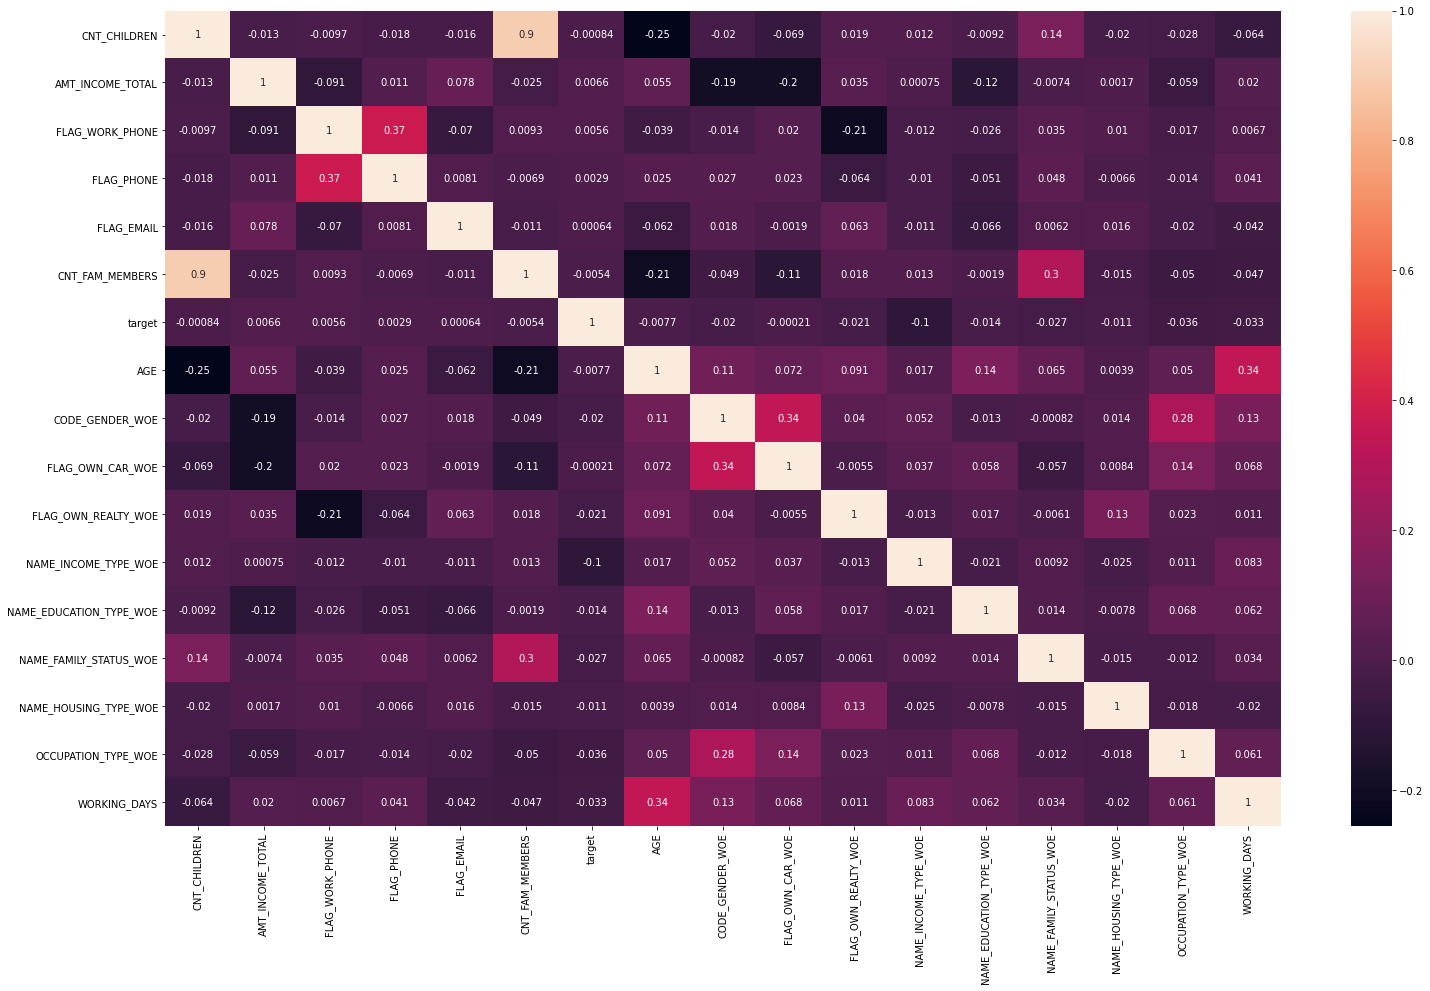

In [176]:
plt.figure(figsize=(25,15))
sns.heatmap(df_cor.corr(),annot=True)
plt.show()

# Model building: Logistic Regression

In [177]:
# import all the necessary libraries 
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

In [179]:
# Selecting the important features for model building
trainCols = ['AGE','CODE_GENDER_WOE', 'FLAG_OWN_CAR_WOE', 'FLAG_OWN_REALTY_WOE', 'NAME_INCOME_TYPE_WOE', 
             'NAME_EDUCATION_TYPE_WOE', 'NAME_FAMILY_STATUS_WOE', 'NAME_HOUSING_TYPE_WOE',
             'OCCUPATION_TYPE_WOE','WORKING_DAYS']

assembler  = VectorAssembler(inputCols = trainCols, outputCol = 'features')
dff = assembler.transform(dff)

In [180]:
# Splitting train and test dataset
train, test = dff.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 17821
Test Dataset Count: 7632


In [181]:
dff.select(['features']).show()

+--------------------+
|            features|
+--------------------+
|[54.0,0.131897,0....|
|[24.0,-0.184999,0...|
|[30.0,0.131897,0....|
|[45.0,-0.184999,-...|
|[38.0,0.131897,-0...|
|[45.0,0.131897,0....|
|[55.0,0.131897,0....|
|[31.0,0.131897,-0...|
|[34.0,0.131897,-0...|
|[25.0,-0.184999,-...|
|[41.0,0.131897,0....|
|[39.0,0.131897,-0...|
|[31.0,-0.184999,-...|
|[45.0,0.131897,0....|
|[51.0,-0.184999,-...|
|[23.0,0.131897,-0...|
|[59.0,-0.184999,-...|
|[32.0,-0.184999,0...|
|[38.0,0.131897,0....|
|[39.0,0.131897,-0...|
+--------------------+
only showing top 20 rows



In [190]:
# Building the logistic regression model
lr = LogisticRegression(featuresCol = 'features', labelCol = 'target', maxIter=30, threshold = 0.3)
model = lr.fit(train)
result = model.evaluate(train)

In [191]:
result.accuracy

0.9846809943325291

In [192]:
result.areaUnderROC

0.6631652292696286

In [193]:
result.recallByLabel

[0.9996010941417826, 0.02564102564102564]

In [194]:
# Negative samples(0- good customers) and positive samples(1- bad customers) being predicted correctly respectively
result.truePositiveRateByLabel

[0.9996010941417826, 0.02564102564102564]

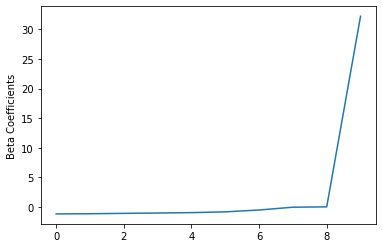

In [195]:
# Plotting the coefficients or weights of the selected variables
beta = np.sort(model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

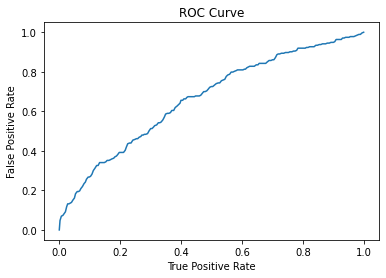

Training set areaUnderROC: 0.6631652292696286


In [196]:
# Plotting the ROC
trainingSummary = model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

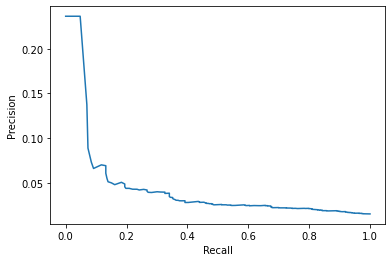

In [197]:
# Plotting the precision and recall
pr = trainingSummary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [198]:
predictions = model.transform(test)
predictions.select('target','rawPrediction', 'prediction', 'probability').show(20)

+------+--------------------+----------+--------------------+
|target|       rawPrediction|prediction|         probability|
+------+--------------------+----------+--------------------+
|     0|[4.35134619882236...|       0.0|[0.98727457458901...|
|     0|[4.94407891169632...|       0.0|[0.99292493833992...|
|     0|[5.26936283411940...|       0.0|[0.99487946587001...|
|     0|[5.61049535566583...|       0.0|[0.99635408506173...|
|     0|[4.75051288614899...|       0.0|[0.99142687502592...|
|     0|[4.63734093490907...|       0.0|[0.99040945693474...|
|     0|[4.49891225538128...|       0.0|[0.98900123139717...|
|     0|[4.46428227476591...|       0.0|[0.98861808356796...|
|     0|[4.23517094313797...|       0.0|[0.98572926699986...|
|     0|[5.96433165809151...|       0.0|[0.99743782078132...|
|     0|[4.45783891847154...|       0.0|[0.98854535181646...|
|     0|[4.03656537914058...|       0.0|[0.98264837825557...|
|     0|[3.35378942960719...|       0.0|[0.96622870663370...|
|     0|

In [ ]:
# Evaluating the AREA UNDER ROC for the predicted variable
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction',labelCol='target')
print('Test Area Under ROC', evaluator.evaluate(predictions))

In [ ]:
prediction_res = model.evaluate(test)

In [260]:
prediction_res.accuracy

0.9804769392033543

In [261]:
prediction_res.recallByLabel

[0.9995990912735534, 0.020134228187919462]

In [273]:
# To calculate confusion matrix, recall, precision and F1- Score

predictions.groupBy('target', 'prediction').count().show()
# TP = [1,1] = 3
# TN = [0,0] = 7480
# FP = [0,1] = 3
# FN = [1,0] = 146

+------+----------+-----+
|target|prediction|count|
+------+----------+-----+
|     1|       0.0|  146|
|     0|       0.0| 7480|
|     1|       1.0|    3|
|     0|       1.0|    3|
+------+----------+-----+



In [276]:
# compute TN, TP, FN, and FP- the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND target = prediction').count()
TP = predictions.filter('prediction = 1 AND target = prediction').count()
FN = predictions.filter('prediction = 0 AND target <> prediction').count()
FP = predictions.filter('prediction = 1 AND target <> prediction').count()
# calculate accuracy, precision, recall, and F1-score
accuracy = (TN + TP) / (TN + TP + FN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
F =  2 * (precision*recall) / (precision + recall)
print('precision: %0.3f' % precision)
print('recall: %0.3f' % recall)
print('accuracy: %0.3f' % accuracy)
print('F1 score: %0.3f' % F)

precision: 0.500
recall: 0.020
accuracy: 0.980
F1 score: 0.039


## Fine tuning the logistic regression model

In [279]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

pipeline = L
params = ParamGridBuilder()
params = params.addGrid(lr.regParam, [.01, .1, 1, 10]) .addGrid(lr.elasticNetParam, [0, .5, 1])
params = params.build()
cv = CrossValidator(estimator=pipeline
                    estimatorParamMaps=params,
                    evaluator=evaluator,
                    numFolds=5)